# Plotting class - ROI playground

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up basics
import datajoint as dj 

In [3]:
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()
# Load hotte's schema
imhotte = dj.schema('user_horsto_imaging')
imhotte.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


In [4]:
# Make plots prettier
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

In [5]:
from dj_plotter import dj_plotter

In [6]:
Recording & FilteredRecordings & 'animal_name = "88592"'

recording_name Meta session name (hash),recording_order Order of session within meta sessions (zero index!),"recording_name Recording name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",animal_id,datasource_id,animal_name Animal name in mlims,timestamp,combined,timeseries_name Timeseries name [e.g. MUnit_0],experiment_type,username NTNU username
05304a7b5f0d845a,0,5b92b96313c3fc19,ecbacf7da55524de,0,88592,2019-11-30 11:45:32,yes,88592-openfield,2Pminiscope_A,horsto
0aeadba614fa2e08,0,59825ec5641c94b4,ecbacf7da55524de,0,88592,2019-12-03 09:14:03,yes,88592-openfield,2Pminiscope_A,horsto
36d204245f17059c,1,6219cdf918217a54,ecbacf7da55524de,0,88592,2019-12-10 10:15:59,yes,88592-openfield,2Pminiscope_A,horsto
4daac2b7cd4024ad,0,5503c4eddc4396ab,ecbacf7da55524de,0,88592,2019-11-26 09:53:13,yes,88592-openfield,2Pminiscope_A,horsto
5e192857bec0c163,0,1f20835f09e28706,ecbacf7da55524de,0,88592,2019-12-12 17:11:19,yes,88592-openfield,2Pminiscope_A,horsto
5f3dfb315b3bd26a,0,b75b9119bb10fc0a,ecbacf7da55524de,0,88592,2019-12-07 10:45:05,yes,88592-openfield,2Pminiscope_A,horsto
7fe85956cf454f25,0,7130f687687996a7,ecbacf7da55524de,0,88592,2019-12-05 18:06:54,yes,88592-openfield,2Pminiscope_A,horsto
9eedcb2fc1c0dc44,0,7e888f1d8eaab46b,ecbacf7da55524de,0,88592,2019-12-09 13:30:20,yes,88592-openfield,2Pminiscope_A,horsto
d33dd81ec9b659ca,0,c221438d58a0b796,ecbacf7da55524de,0,88592,2019-11-27 10:10:14,yes,88592-openfield,2Pminiscope_A,horsto
e727146cd20822d9,0,8a50a33f7fd91df4,ecbacf7da55524de,0,88592,2019-12-02 16:27:27,yes,88592-openfield,2Pminiscope_A,horsto


In [7]:
parameter_dict_cell = FilteredCellsParams.fetch1('parameter_dict_cell')
print(parameter_dict_cell)

{'ang_params_id': 'A', 'border_params_id': 'A', 'bv_field_dect_method': 'bvs', 'bvfield_params_id': 'A', 'bvscore_params_id': 'A', 'channel': 'primary', 'field_params_id': 'A', 'grid_params_id': 'A', 'map_params_id': 'A', 'noise_calc_id': 'A', 'ov_cutoff_id': 'A', 'ov_params_id': 'A', 's_t_params_id': 'A', 'shuffle_params_id': 'A', 'signal_type': 'events', 'event_filter_id': 'A', 'trackingparams_id': 'A'}


In [8]:
some_cells = Recording * ProjectionCorr * RoisCorr \
                     * GridScore * GridScore.Stats\
                     & 'center_plane=0' \
                     & parameter_dict_cell\
                     & FilteredCells \
                     & 'recording_name = "5b92b96313c3fc19"'
                    
len(some_cells)

165

In [9]:
# Make your own color array, where cells with gridscore below a certain threshold are colored gray 
from dj_plotter.helpers.plotting_helpers import make_linear_colormap
gridscores = some_cells.fetch('gridscore')
colors = make_linear_colormap(gridscores, cmap='magma')
colors[gridscores < .5] = [.7, .7, .7]

Drawing ROIs:   0%|          | 0/165 [00:00<?, ?it/s]

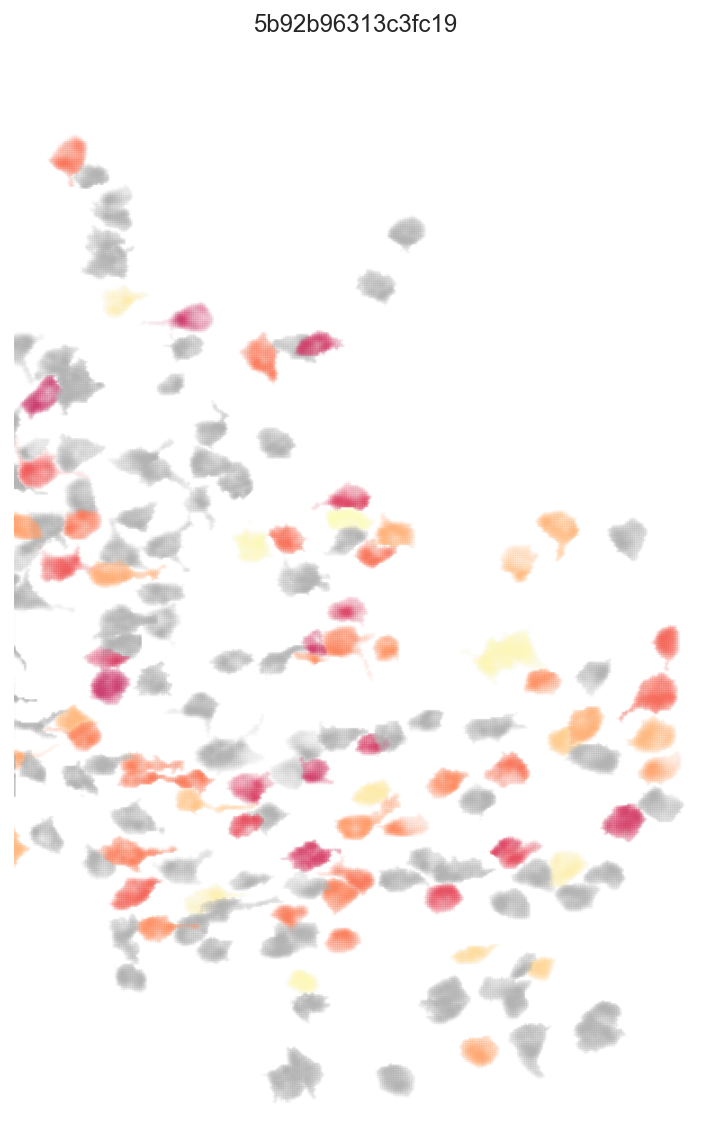

In [10]:
plot = dj_plotter(some_cells)
plot.rois(hash_or_animal='hash',draw_image=False, draw_pixels=True, \
          draw_centers=False, draw_outlines=False, colors=colors, dot_size=2)

In [11]:
Recording & 'recording_name= "f1cb3960d08cf736"'

recording_name Meta session name (hash),recording_order Order of session within meta sessions (zero index!),"recording_name Recording name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",animal_id,datasource_id,animal_name Animal name in mlims,timestamp,combined,timeseries_name Timeseries name [e.g. MUnit_0],experiment_type,username NTNU username
a3d81f51ba767977,0,f1cb3960d08cf736,c2103817ea35f837,0,82951,2018-10-10 10:36:52,yes,82951,2Pminiscope_A,horsto
